# **Basic Python**

## 1.a 
Give a function F that takes a single argument n. This function should print a sequence of n strings as described in the examples below: <br>
Ex: **n = 3**

--A--<br>
-BAB-<br>
CBABC<br>

**n = 4**

---A---<br>
--BAB--<br>
-CBABC-<br>
DCBABCD

In [101]:
def F(n):
    # Start coding
    A = ord('A')
    for i in range(n):
        for j in range(n-i-1):
            print('-', end='')
        for j in range(n-i-1, n+i):
            print(chr(A + abs(j-n+1)), end='')
        for j in range(n+i, 2*n-1):
            print('-', end='')
        print('\n')

# Tests
F(10)
F(6)

---------A---------

--------BAB--------

-------CBABC-------

------DCBABCD------

-----EDCBABCDE-----

----FEDCBABCDEF----

---GFEDCBABCDEFG---

--HGFEDCBABCDEFGH--

-IHGFEDCBABCDEFGHI-

JIHGFEDCBABCDEFGHIJ

-----A-----

----BAB----

---CBABC---

--DCBABCD--

-EDCBABCDE-

FEDCBABCDEF



## 1.b
Make a function F that takes only one argument, a dictionary(dict) d.
The keys of d are integers and the values of d are a tuple of type (x (int), y (int)).
You must print out the dict in the format "-key-, -x-, -y-" with each entry in a new line. Print it for each of the three sorted orders, by key values ascending, by x values descending, by y values ascending.

In [102]:
def F(d : dict):
    # Start coding
    triplets = []
    titles = ['Key Values Ascending:', 'x values descending: ', 'y values ascending:']
    for k, (a, b) in d.items():
        triplets.append([k, a, b])

    for i in range(len(titles)):
        temp = triplets.copy()
        if i == 1:
            temp.sort(key=lambda temp: temp[i], reverse=True)
        else:
            temp.sort(key=lambda temp: temp[i])
        print(titles[i])
        for triplet in temp:
            print(*triplet)

    

# Tests
F({1 : (1, 2), 2 : (-1, 4), 5 : (-4, 3), 4 : (2, 3)})
print('\n')
F({-8 : (4, 2), 6 : (-3, 4), 7 : (2, 1), 5 : (9, -10)})

Key Values Ascending:
1 1 2
2 -1 4
4 2 3
5 -4 3
x values descending: 
4 2 3
1 1 2
2 -1 4
5 -4 3
y values ascending:
1 1 2
5 -4 3
4 2 3
2 -1 4


Key Values Ascending:
-8 4 2
5 9 -10
6 -3 4
7 2 1
x values descending: 
5 9 -10
-8 4 2
7 2 1
6 -3 4
y values ascending:
5 9 -10
7 2 1
-8 4 2
6 -3 4


## 2 Working with Student Records

Use the data in **student_records.csv** to complete the given tasks. Do not include any external libraries. Use a Python dictionary if required.

### Reference
- [Python Dictionaries](https://www.w3schools.com/python/python_dictionaries.asp)


#### 2.a: open the student_records.csv file and print out the first 10 rows

In [103]:
with open('student_records.csv', 'r') as f:
    lines = f.read().split('\n')
print(*lines[:10], sep='\n') #Here, I am counting the title as well in the first 10 rows :)

roll_number,department,credit,course_name,course_type,grade
588946,MA,3,EC250,hasmed_elective,AB
145372,EP,4,EP407,hasmed_elective,CC
834515,MA,8,EP885,hasmed_elective,BB
344265,CSE,6,CSE699,honours,AB
358405,MA,3,EE460,minor,AP
781075,CE,8,CE540,honours,CC
180828,CSE,6,CE880,minor,AB
981238,MM,4,CSE226,minor,AB
836881,MM,8,MM530,core,AA


In [104]:
# Storing all data in a dictionary
data = {}
for line in lines[1:]:
    temp = line.split(',')
    data[temp[0]] = {
        "department": temp[1],
        
    }

IndexError: list index out of range

#### 2.b: Print out the total credits and calculate CPI of each student. 
CPI is the weighted average of core courses, and electives (weights being the letter grades converted to number AP,AA=10, AB=9, BB=9, BC=7, CC=6)

In [ ]:
#TODO

#### 2.c: Print out the names of all students who meet the graduation requirements 
Atleast 20 credist of core course, 15 credits of department elective, 10 credits of flexible elective and 5 credits of hasmed electives

In [ ]:
#TODO

#### 2.d: Print out the names of all students who completed a minor 
Atleast 10 credits with minor tag in a specific department

In [ ]:
#TODO

#### 2.e: Print out the names of all students who completed a honours
Atleast 10 credits with honours tag and 20 core credits

In [ ]:
#TODO

# **SciPy** 

## Part A
Minimize the function $f(x, y) = 2(x - y - 3)^2 + 4(x + 2y + 1)^4$.<br>
With the constraints : $ x - y \ge -3, (x + 2)^2 + (y + 1)^2 \le 5$ <br>
Using scipy.optimize.minimize with constraints. (Hint: Look at the examples in the official documentation)

In [137]:
import numpy as np
from scipy.optimize import minimize
def f(vars):
    x, y = vars
    return 2*(x-y-3)**2 + 4*(x + 2*y + 1)**4

def c1(vars):
    x, y = vars
    # bringing all terms to one side
    return x-y + 3

def c2(vars):
    x, y = vars
    # bringing all terms to one side
    return 5- ((x+2)**2 + (y+1)**2)

cons = ({'type': 'ineq', 'fun': c1}, {'type': 'ineq', 'fun': c2})
result = minimize(f, np.array([0, 0]), method='SLSQP',  constraints=cons)
print(result)


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 7.345026216976594
       x: [ 2.349e-01 -9.285e-01]
     nit: 9
     jac: [-1.120e+01 -3.582e-01]
    nfev: 31
    njev: 9


# Part B
Evaluate the line integral of the function $f(x, y) = x^2 + y^4$ along the circle $ x^2 + y^2 = 3 $ anticlockwise (scalar integral, not vector). You must use scipy for integration but you may use parameterization

#### Parameterizing the circle:
The circle $x^2 + y^2 = 3$ can be parameterized as:</br>
$
x = \sqrt{3} \cos(t), \quad y = \sqrt{3} \sin(t), \quad t \in [0, 2\pi].
$

#### Computing $ds$:
The differential arc length $ds$ is given by:
$
ds = \sqrt{\left(\frac{dx}{dt}\right)^2 + \left(\frac{dy}{dt}\right)^2} \, dt = \sqrt{3} \, dt,
$

#### Setting Up the Integral:
On substituting $x(t)$ and $y(t)$ into $f(x, y)$:</br>
$
f(x, y) = (\sqrt{3} \cos(t))^2 + (\sqrt{3} \sin(t))^4.
$
</br>

The integral becomes:</br>
$
\int_C f(x, y) \, ds = \int_0^{2\pi} \left( 3 \cos^2(t) + 9 \sin^4(t) \right) \sqrt{3} \, dt.
$

In [139]:
import numpy as np
from scipy.integrate import quad

def integrand(t):
    c = np.sqrt(3)
    return ((c * np.cos(t))**2 + (c * np.sin(t))**4) * c

result, _ = quad(integrand, 0, 2*np.pi)
print(result)

53.05363140385085


# **Numpy**

### Read Lisan_Al_Gaib.pdf for problem description and complete the following functions

In [114]:
import time # to time the execution
import numpy as np
import matplotlib.pyplot as plt

In [106]:
### TODO 1
### Load data from data_path
### Check the input file spice_locations.txt to understand the Data Format
### Return : np array of size Nx2
def load_data(data_path):
    data = np.loadtxt(data_path, dtype=float, delimiter=',')
    return data

In [126]:
### TODO 2.1
### If init_centers is None, initialize the centers by selecting K data points at random without replacement
### Else, use the centers provided in init_centers
### Return : np array of size Kx2
def initialise_centers(data, K, init_centers=None):
    if init_centers is None:
        return data[np.random.choice(len(data), size=K, replace=False)]
    else:
        return data[np.random.choice(len(init_centers), size=K, replace=False)]

In [108]:
### TODO 2.2
### Initialize the labels to all ones to size (N,) where N is the number of data points
### Return : np array of size N
def initialise_labels(data):
    return np.ones(len(data))

In [111]:
### TODO 3.1 : E step
### For Each data point, find the distance to each center
### Return : np array of size NxK
def calculate_distances(data, centers):
    return np.linalg.norm(data[:, np.newaxis, :] - centers, axis=-1)

In [112]:
### TODO 3.2 : E step
### For Each data point, assign the label of the nearest center
### Return : np array of size N
def update_labels(distances):
    return np.argmin(distances, axis=1)

In [116]:
### TODO 4 : M step
### Update the centers to the mean of the data points assigned to it
### Return : np array of size Kx2
def update_centers(data, labels, K):
    unique_labels, counts = np.unique(labels, return_counts=True)
    new_centroids = np.zeros((K, 2))
    for label, count in zip(unique_labels, counts):
        new_centroids[label] = np.sum(data[labels == label], axis=0) / count
    return new_centroids


In [131]:
### TODO 6 : Check convergence
### Check if the labels have changed from the previous iteration
### Return : True / False
def check_termination(labels1, labels2):
    return np.array_equal(labels1, labels2)

In [118]:
### DON'T CHANGE ANYTHING IN THE FOLLOWING FUNCTION
def kmeans(data_path:str, K:int, init_centers):
    '''
    Input :
        data (type str): path to the file containing the data
        K (type int): number of clusters
        init_centers (type numpy.ndarray): initial centers. shape = (K, 2) or None
    Output :
        centers (type numpy.ndarray): final centers. shape = (K, 2)
        labels (type numpy.ndarray): label of each data point. shape = (N,)
        time (type float): time taken by the algorithm to converge in seconds
    N is the number of data points each of shape (2,)
    '''
    data = load_data(data_path)    
    centers = initialise_centers(data, K, init_centers)
    labels = initialise_labels(data)

    start_time = time.time() # Time stamp 

    while True:
        distances = calculate_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new): break
        else: labels = labels_new
 
    end_time = time.time() # Time stamp after the algorithm ends
    return centers, labels, end_time - start_time 

In [119]:
### TODO 7
def visualise(data_path, labels, centers):
    data = load_data(data_path)

    # Scatter plot of the data points
    plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

    ### Set title as 'K-means clustering'
    plt.title('K-means Clustering')

    ### Set xlabel as 'Longitude'
    plt.xlabel('Longitude')

    ### Set ylabel as 'Latitude'
    plt.ylabel('Latitude')

    ### Save the plot as 'kmeans.png'
    plt.savefig('kmeans.png')


    ## DO NOT CHANGE THE FOLLOWING LINE
    return plt

Time taken for the algorithm to converge: 0.007004737854003906


<module 'matplotlib.pyplot' from 'c:\\Users\\ARYAN KUMAR\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\pyplot.py'>

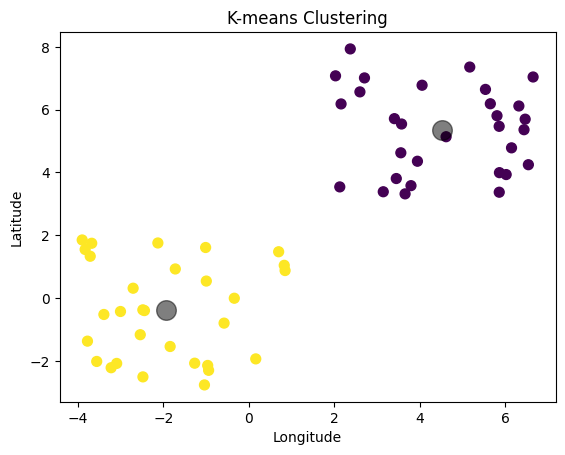

In [132]:
### After you have completed the above functions, run the following code to generate the plot
data_path = 'spice_locations.txt'
K, init_centers = 2, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)